<a href="https://colab.research.google.com/github/rasikaneela/EMC-DSA-B-01/blob/main/irisflowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
#Petal length and width is only used for classification
X=iris.data[:,[2,3]]
Y=iris.target

In [ ]:
import pandas as pd
iris_df=pd.DataFrame(iris.data[:,[2,3]],columns=iris.feature_names[2:])
iris_df.shape


(150, 2)

In [ ]:
print(iris_df.head())

   petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2


In [ ]:
import numpy as np
#Print the unique labels of Dataset
print('\n' + 'The unique labels in this data are' + str(np.unique(Y)))


The unique labels in this data are[0 1 2]


In [ ]:
#Splitting dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.3,random_state=0)



In [ ]:
X_train.shape


(105, 2)

In [ ]:
X_test.shape

(45, 2)

/tmp/ipython-input-3758069804.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],


ValueError: Unrecognized marker style '0'

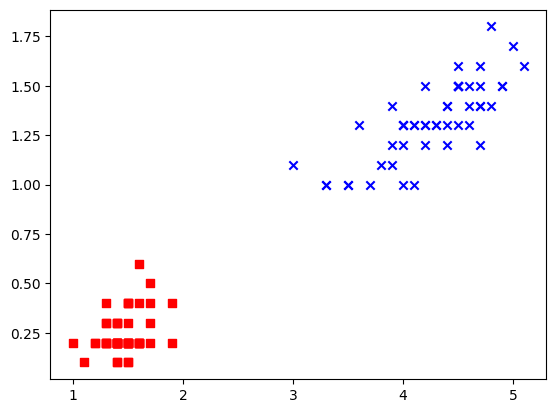

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
markers = ('s', 'x', '0')
colors = ('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[: len(np. unique (Y))])
for idx, cl in enumerate (np. unique(Y)):
    plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                c=cmap(idx), marker=markers[idx], label=cl)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
print('After standardising our features, the first 5 rows of our data now look like this:\n')
print(pd.DataFrame(X_train_std,columns=iris_df.columns).head())

After standardising our features, the first 5 rows of our data now look like this:

   petal length (cm)  petal width (cm)
0          -0.182950         -0.293181
1           0.930661          0.737246
2           1.042022          1.638870
3           0.652258          0.350836
4           1.097702          0.737246


/tmp/ipython-input-2298954538.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)


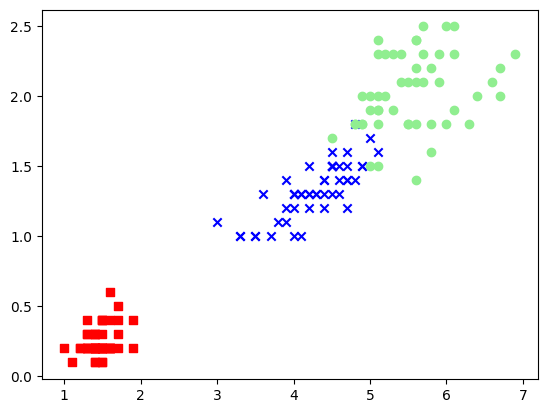

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
markers=('s', 'x', 'o')
colors=('red', 'blue', 'lightgreen')
cmap = ListedColormap(colors[: len(np. unique (y_test))])
for idx, cl in enumerate (np. unique(Y)):
     plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

In [ ]:
from sklearn.svm import SVC
svm=SVC (kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train_std, y_train)
print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score (X_train_std, y_train)))
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score (X_test_std, y_test)))

The accuracy of the svm classifier on training data is 0.95 out of 1
The accuracy of the svm classifier on test data is 0.98 out of 1


In [ ]:
plot_decision_regions(X_test_std,y_test,svm)

NameError: name 'plot_decision_regions' is not defined

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier (n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn.score (X_train_std, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn.score (X_test_std, y_test)))

The accuracy of the knn classifier is 0.95 out of 1 on training data
The accuracy of the knn classifier is 1.00 out of 1 on test data
